<a href="https://colab.research.google.com/github/kanishk16/Stepping-Up-with-CV/blob/master/OpenCV_basics_Refresher_(Day_02).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# neccessary imports
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import imutils as its
from google.colab.patches import cv2_imshow as cv_imshow

# version check
cv.__version__

'3.4.3'

In [2]:
!pip install imutils

Dim: (322, 600, 3) Type: <class 'numpy.ndarray'>


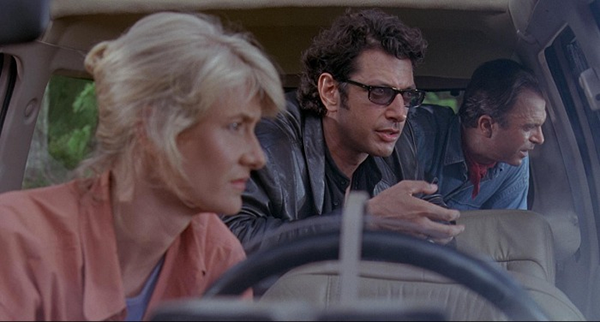

In [24]:
# Read the img
img = cv.imread('jp.png')

# rows(y/height) x columns(x/width) x channels(z/depth)
print('Dim:', img.shape, 'Type:', type(img))

# display the img
cv_imshow(img)

In [6]:
# access BGR pixel at (50,100) ~ [100,50] (y/rows, x/columns)
b,g,r = img[100,50]
print(b,g,r)

37 49 41


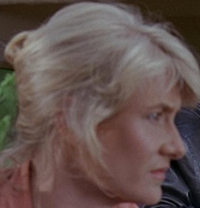

In [15]:
# extract ROI - (y,x) to (n,m) = [startY:endY(y:n), startX:endX(x:m)]
roi = img[10:218, 80:280]
cv_imshow(roi)

(100, 200, 3)


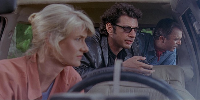

In [20]:
# resizing the img. resize(path_to_img, (x,y))
imgr = cv.resize(img, (200,100))
print(imgr.shape)
cv_imshow(imgr)

(161, 300, 3)


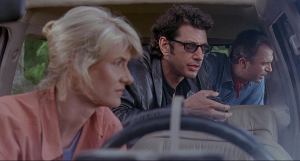

In [25]:
# resizing by preserving the aspect ratio (width = 300)
h,w,c = img.shape
ar = 300/w

# computing the other dim as per the aspect ratio 
dim = (300, int(h*ar))

imgr = cv.resize(img, dim)
print(imgr.shape)
cv_imshow(imgr)

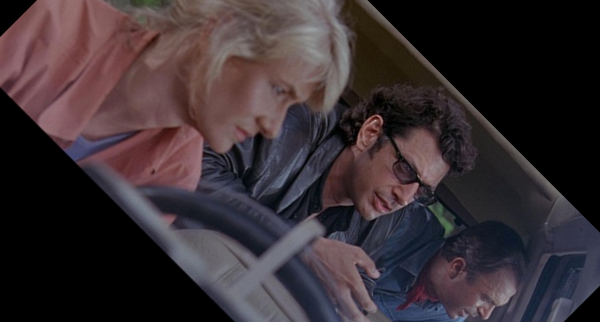

In [28]:
# Rotating the img.
# computing the img. center
c = (w//2, h//2)

# constructing the rotation matrix
rotation_matrix = cv.getRotationMatrix2D(c, -45, 1.0)

# rotating the img.
img_rot = cv.warpAffine(img, rotation_matrix, (w,h))

cv_imshow(img_rot)

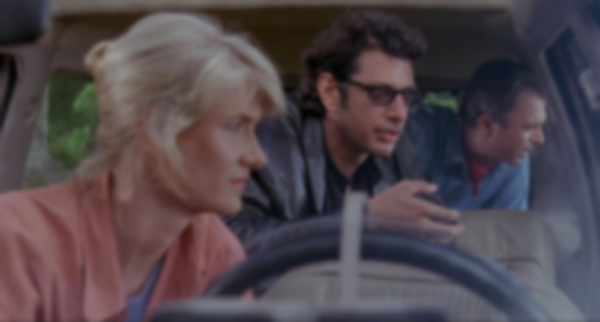

In [29]:
# blurring 
img_blur = cv.GaussianBlur(img, (11,11), 0)
cv_imshow(img_blur)

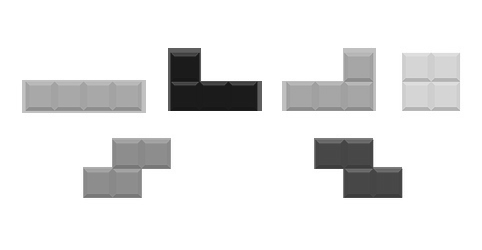

In [32]:
# converting to gray scale 
img1 = cv.imread('tetris_blocks.png')
img_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
cv_imshow(img_gray)

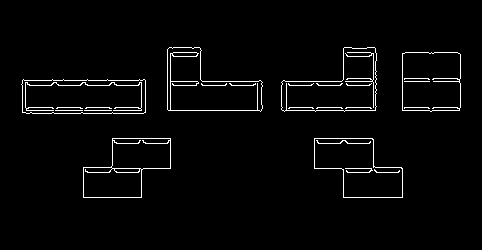

In [33]:
# Edge Detection: outline of objects
img_edge = cv.Canny(img_gray, 30, 150)
cv_imshow(img_edge)

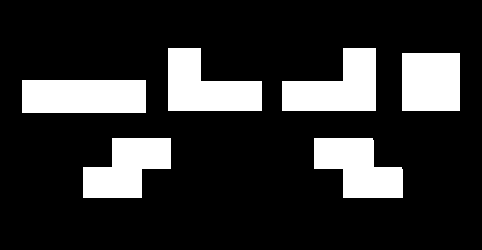

In [35]:
# Thresholding - val < minVal: val=0 else:1
retval, img_thresh = cv.threshold(img_gray, 225, 255, cv.THRESH_BINARY_INV)
cv_imshow(img_thresh)

In [47]:
# Detecting and drawing contours
cntrs = cv.findContours(img_thresh.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) 
img_cpy = img.copy()
# print(cntrs)
# loop over the contours
for c in cntrs:
  # draw each contour on the output image with a 3px thick purple outline + display each one
  cv.drawContours(img_cpy, [c], -1, (240, 0, 159), 3)
  cv.imshow(img_cpy)

(array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), [array([[[314, 138]],

       [[314, 168]],

       [[342, 168]],

       [[343, 169]],

       [[343, 197]],

       [[402, 197]],

       [[402, 169]],

       [[401, 168]],

       [[401, 167]],

       [[374, 167]],

       [[373, 166]],

       [[373, 140]],

       [[372, 139]],

       [[372, 138]]], dtype=int32), array([[[112, 138]],

       [[112, 166]],

       [[111, 167]],

       [[ 83, 167]],

       [[ 83, 197]],

       [[141, 197]],

       [[141, 169]],

       [[142, 168]],

       [[170, 168]],

       [[170, 138]]], dtype=int32), array([[[ 22,  80]],

       [[ 22, 112]],

       [[145, 112]],

       [[145,  80]]], dtype=int32), array([[[402,  53]],

       [[402, 110]],

       [[459, 110]],

       [[459,  53]]], dtype=int32), array([[[343,  48]]

error: ignored